In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np
import pymaster as nmt
from scipy.interpolate import interp1d
from astropy.io import fits

In [3]:
y_mask = hp.read_map('/home/zgd/cmb_y/data/Planck/mask/COM_CompMap_Compton-SZMap-masks_2048_R2.01.fits', field=1)
y_mask_LFI = hp.read_map('/home/zgd/cmb_y/data/Planck/mask/LFI_inpainting_bool.fits', field=0)
y_mask_HFI = hp.read_map('/home/zgd/cmb_y/data/Planck/mask/HFI_inpainting_bool.fits', field=0)
print('read complete, apodizing...')

aposcale = 1.0
# apodize
y_mask_LFI_apodized = nmt.mask_apodization(y_mask_LFI, aposcale, apotype='C1')
y_mask_HFI_apodized = nmt.mask_apodization(y_mask_HFI, aposcale, apotype='C1')

y_mask = y_mask*y_mask_LFI_apodized*y_mask_HFI_apodized

FileNotFoundError: [Errno 2] No such file or directory: '/home/zgd/cmb_y/data/Planck/mask/COM_CompMap_Compton-SZMap-masks_2048_R2.01.fits'

0.4197986133714097
0.5857119957605997


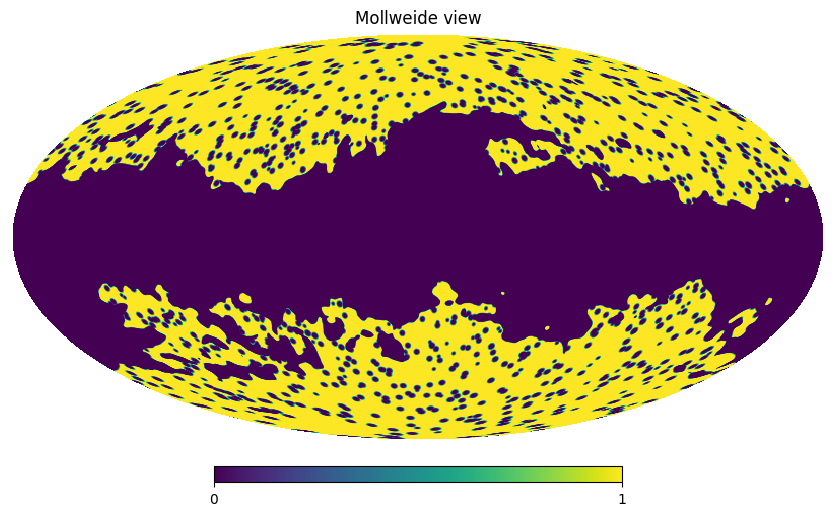

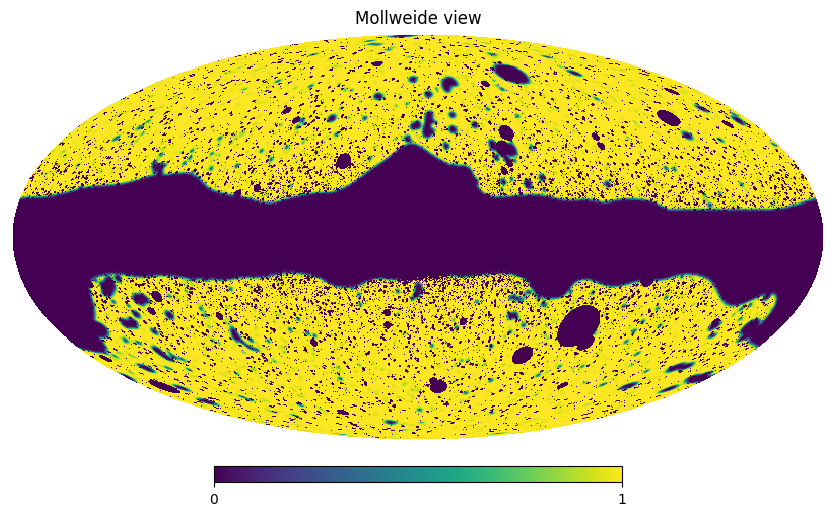

In [3]:
NSIDE =2048

gal_mask = hp.read_map('/home/zgd/cmb_y/data/unWISE/mask/mask_unWISE_full_v10.fits', field=0)

weight0 = hp.read_map('/home/zgd/cmb_y/data/unWISE/weights/blue_w2_5sig_weights.fits')
weight1 = hp.read_map('/home/zgd/cmb_y/data/unWISE/weights/blue_star_weights.fits')
gal_weights = hp.ud_grade(weight0*weight1,NSIDE)

hdul = fits.open('/home/zgd/cmb_y/data/unWISE/loss/unmaskedareafrac-flag.fits')
gal_loss = hdul[0].data
hdul.close()

hp.mollview(y_mask)
print(np.sum(y_mask)/(12*2048**2))
hp.mollview(gal_mask)
print(np.sum(gal_mask)/(12*2048**2))

In [4]:
np.seterr(divide='ignore', invalid='ignore')

raw_density = np.load('/home/zgd/cmb_y/data/unWISE/blue_w1_mean/map_w1_mean.npy')
galaxy_w1 = raw_density*gal_mask*gal_weights/gal_loss
galaxy_w1[np.isnan(galaxy_w1)] = 0

raw_density = np.load('/home/zgd/cmb_y/data/unWISE/blue_w2_mean/map_w2_mean.npy')
galaxy_w2 = raw_density*gal_mask*gal_weights/gal_loss
galaxy_w2[np.isnan(galaxy_w2)] = 0

gal_count = np.load('/home/zgd/cmb_y/data/unWISE/blue_count/map_count.npy')
galaxy_num = gal_count*gal_mask*gal_weights/gal_loss
galaxy_num[np.isnan(galaxy_num)] = 0

In [5]:
# np.seterr(divide='ignore', invalid='ignore')
# galaxy_density = get_galaxy_map('/home/zgd/cmb_y/data/unWISE/blue/numcounts_map1_2048-r1-v2_flag.fits',masked=False,weighted=True,normed=True)
# galaxy_w1 = get_galaxy_map('/home/zgd/cmb_y/data/unWISE/blue_w1_mean/map_w1_mean.npy',masked=False,weighted=True)
# galaxy_w2 = get_galaxy_map('/home/zgd/cmb_y/data/unWISE/blue_w2_mean/map_w2_mean.npy',masked=False,weighted=True)
# # galaxy_density_unweighted = get_galaxy_map('blue',weighted=False)
# # galaxy_density_unlossed = get_galaxy_map('blue',weighted = True,lossed = 2.0)

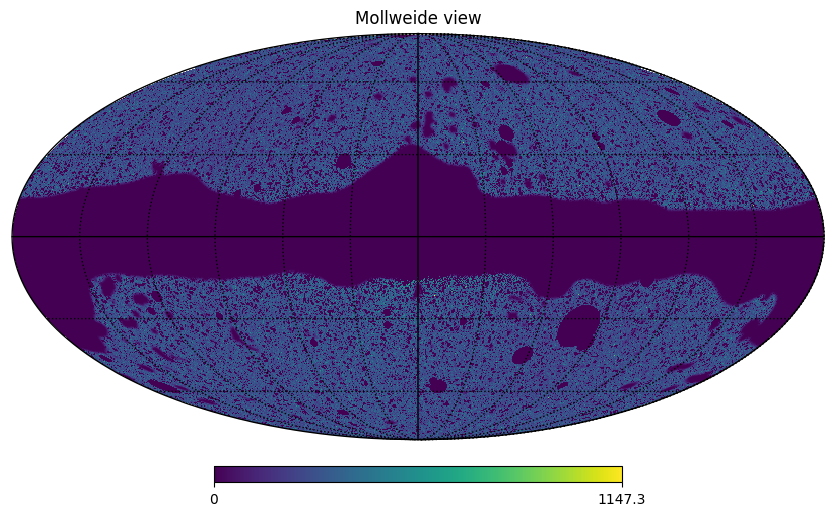

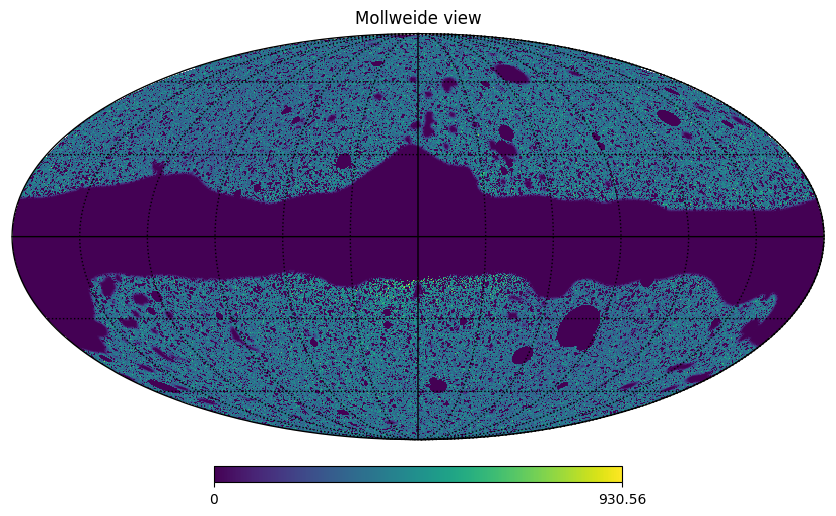

In [6]:
hp.mollview(galaxy_w1)
hp.graticule()
hp.mollview(galaxy_w2)
hp.graticule()

In [7]:
# CUT = 0 #deg

# mask_cut = np.ones(12*2048**2)
# pix_index = np.arange(12*2048**2)
# theta,phi = hp.pix2ang(2048,pix_index)
# mask_cut[pix_index[(theta<(90+CUT)/180*np.pi) &(theta>(90-CUT)/180*np.pi)]] = 0

LMAX = 2048
LMIN = 128

f_sky_cut = np.sum(gal_mask*y_mask)/np.shape(gal_mask)[0]
print('fsky_cut = {}'.format(f_sky_cut))

alm_w1 = hp.map2alm(galaxy_w1*y_mask*gal_mask,lmax=LMAX)
alm_w1/=np.sqrt(f_sky_cut)
print('done alm conversion w1')

alm_w2 = hp.map2alm(galaxy_w2*y_mask*gal_mask,lmax=LMAX)
alm_w2/=np.sqrt(f_sky_cut)
print('done alm conversion w2')


fsky_cut = 0.3675711937488833
done alm conversion w1
done alm conversion w2


In [8]:
ymap_path_dict= {'no_deprojection':'/home/zgd/cmb_y/data/Planck/ymap/no_deprojection_standard_full.fits',
                 'CIB+CMB_default':'/home/zgd/cmb_y/data/Planck/ymap/deproject_CMB_CIB_default_standard_full.fits',
                 'CIB+CMB+dT+dbeta_default':'/home/zgd/cmb_y/data/Planck/ymap/deproject_CMB5_CIB_CIBdbeta_CIBdT_default_standard_full.fits',
                 'CIB+CMB_T=24_beta=1.0':'/home/zgd/cmb_y/data/Planck/ymap/SED/deproject_CMB_CIB_beta1.0_T24_standard_full.fits',
                 'CIB+CMB_T=24_beta=1.2':'/home/zgd/cmb_y/data/Planck/ymap/SED/deproject_CMB_CIB_beta1.2_T24_standard_full.fits',
                 'CIB+CMB_T=24_beta=1.4':'/home/zgd/cmb_y/data/Planck/ymap/SED/deproject_CMB_CIB_beta1.4_T24_standard_full.fits',
                 'CIB+CMB_T=24_beta=1.6':'/home/zgd/cmb_y/data/Planck/ymap/SED/deproject_CMB_CIB_beta1.6_T24_standard_full.fits',
                 'CIB+CMB_T=10.14_beta=1.4':'/home/zgd/cmb_y/data/Planck/ymap/SED/deproject_CMB_CIB_beta1.4_T10.14_standard_full.fits',
                 'CIB+CMB_T=10.14_beta=1.6':'/home/zgd/cmb_y/data/Planck/ymap/SED/deproject_CMB_CIB_beta1.6_T10.14_standard_full.fits',
                 'CIB+CMB_T=10.14_beta=1.9':'/home/zgd/cmb_y/data/Planck/ymap/SED/deproject_CMB_CIB_beta1.9_T10.14_standard_full.fits',}

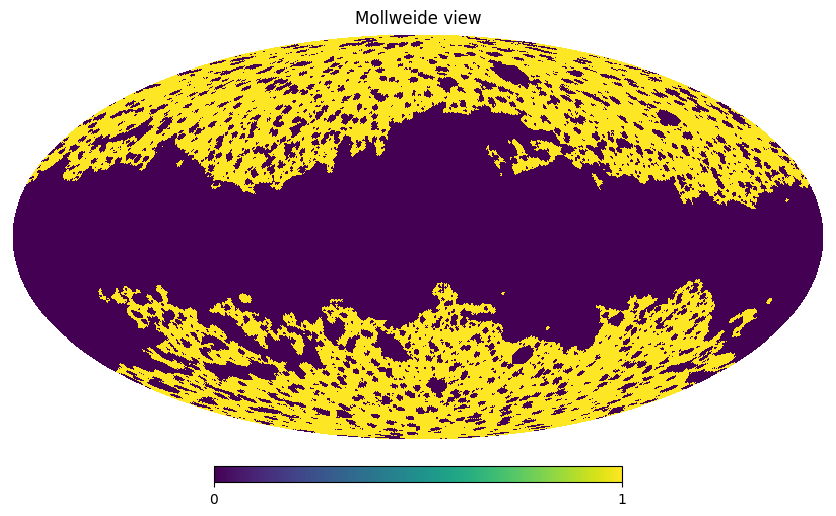

In [123]:
ysample = 'CIB+CMB_T=10.14_beta=1.9'
ymap = hp.read_map(ymap_path_dict[ysample])
ymap = hp.ud_grade(ymap,2048)
ymap = ymap*y_mask*gal_mask
ymap /= galaxy_num
ymap[galaxy_num==0] = 0

alm_y = hp.map2alm(ymap,lmax=LMAX)
alm_y /= np.sqrt(f_sky_cut)
#Filter out low multipoles
filtered_alm_w1 = hp.almxfl(alm_w1, hp.Alm.getlm(LMAX)[0] >= LMIN)
filtered_alm_w2 = hp.almxfl(alm_w2, hp.Alm.getlm(LMAX)[0] >= LMIN)
filtered_alm_y = hp.almxfl(alm_y, hp.Alm.getlm(LMAX)[0] >= LMIN)
#Reconstruct the map, with lower resolution
nside = 128
w1 = hp.alm2map(filtered_alm_w1,nside)
w2 = hp.alm2map(filtered_alm_w2,nside)
c12 = w1-w2
logw1 = np.log10(w1)
y = hp.alm2map(filtered_alm_y,nside)
mask_all_nside = hp.ud_grade(gal_mask*y_mask,nside)
mask_bool_nside = (mask_all_nside>0.5)*(w1!=0)*(w1!=0)
hp.mollview(mask_bool_nside)

logw1_masked = logw1[mask_bool_nside]
c12_masked = c12[mask_bool_nside]
y_masked = y[mask_bool_nside]
w1_masked = w1[mask_bool_nside]

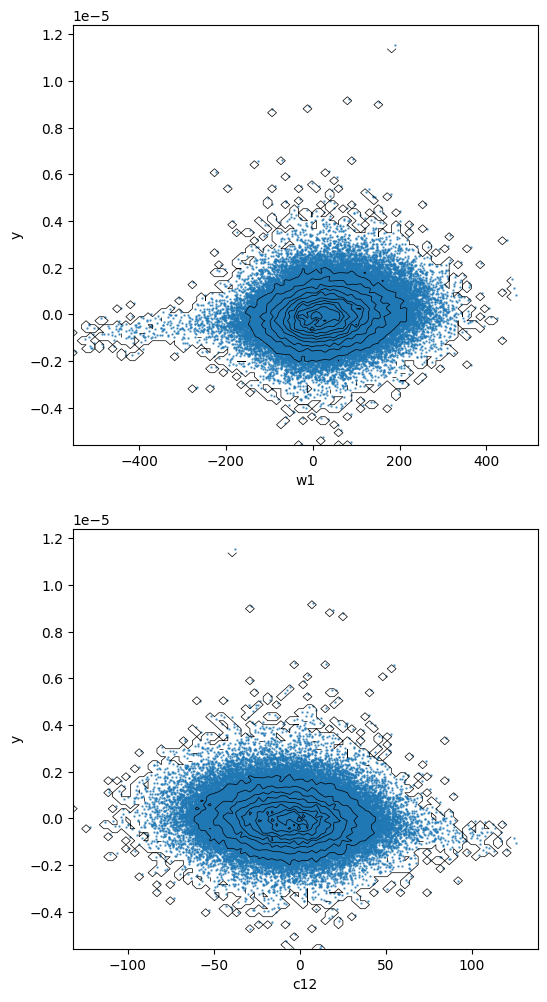

In [124]:
fig, ax = plt.subplots(2, figsize=(6,12))

ax[0].scatter(w1_masked,y_masked,s=0.5,alpha=0.7)
ax[1].scatter(c12_masked,y_masked,s=0.5,alpha=0.7)
H1, xedges1, yedges1 = np.histogram2d(w1_masked,y_masked,bins=100)
H2, xedges2, yedges2 = np.histogram2d(c12_masked,y_masked,bins=100)
ax[0].contour(xedges1[:-1], yedges1[:-1], H1.T, levels=10, linewidths=0.5, colors='k')
ax[1].contour(xedges2[:-1], yedges2[:-1], H2.T, levels=10, linewidths=0.5, colors='k')
ax[0].set_xlabel('w1')
ax[0].set_ylabel('y')
ax[1].set_xlabel('c12')
ax[1].set_ylabel('y')
plt.show()

Text(0.5, 1.0, 'c12')

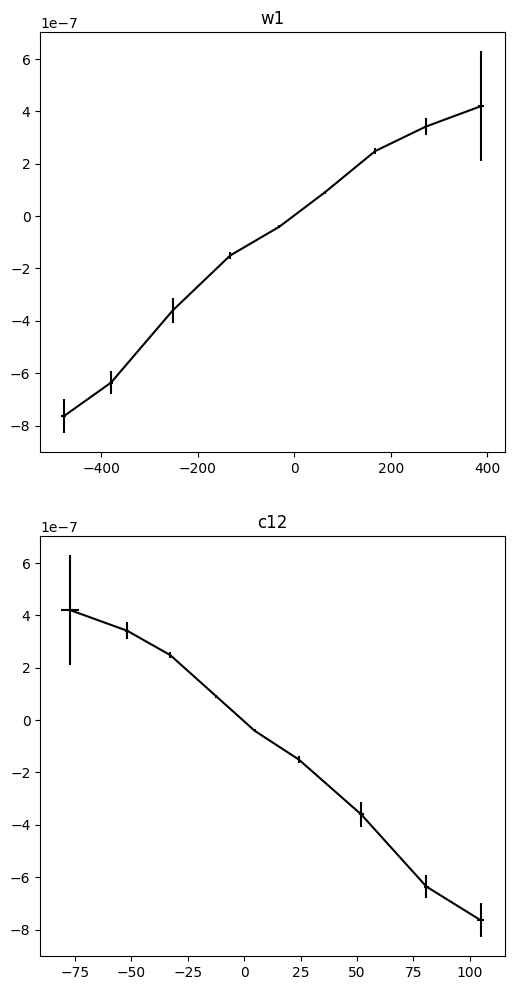

In [125]:
bins = np.linspace(np.min(w1_masked),np.max(w1_masked),10,endpoint=True)
fig, ax = plt.subplots(2, figsize=(6,12))
y_binned = np.zeros(len(bins)-1)
w1_binned = np.zeros(len(bins)-1)
c12_binned = np.zeros(len(bins)-1)
y_binned_err = np.zeros(len(bins)-1)
w1_binned_err = np.zeros(len(bins)-1)
c12_binned_err = np.zeros(len(bins)-1)

for i in range(len(bins)-1):
    mask_bin = (w1_masked>bins[i])&(w1_masked<bins[i+1])
    num_bin = np.sum(mask_bin)

    y_binned[i] = np.mean(y_masked[mask_bin])
    y_binned_err[i] = np.std(y_masked[mask_bin])/np.sqrt(num_bin)

    w1_binned[i] = np.mean(w1_masked[mask_bin])
    w1_binned_err[i] = np.std(w1_masked[mask_bin])/np.sqrt(num_bin)

    c12_binned[i] = np.mean(c12_masked[mask_bin])
    c12_binned_err[i] = np.std(c12_masked[mask_bin])/np.sqrt(num_bin)


    # print(len(w1[(w1>bins[i])&(w1<bins[i+1])]))
    # print('standard deviation of w1 = {}'.format(w1_binned_err))
    # print('standard deviation of c12 = {}'.format(c12_binned_err))
    # print('standard deviation of y = {}'.format(y_binned_err))

ax[0].errorbar(w1_binned,y_binned,xerr = w1_binned_err,yerr=y_binned_err,c='k')
ax[1].errorbar(c12_binned,y_binned,xerr = c12_binned_err,yerr=y_binned_err,c='k')

#np.save('./output/w1w2fit/CIBdTdbeta.npy',np.array([w1_binned,c12_binned,y_binned,w1_binned_err,c12_binned_err,y_binned_err]))

ax[0].set_title('w1')
ax[1].set_title('c12')
#fig.savefig('w1_w2_CIBdTdbeta.png',dpi=400)
# ax[0,0].set_yscale('log')
# ax[0,1].set_yscale('log')
# ax[1,0].set_yscale('log')
# ax[1,1].set_yscale('log')


In [126]:
def fit_func(x,y,a,b,c):
    return a*x+b*y+c

def loss(x):
    return np.sum((fit_func(w1_masked,c12_masked,x[0],x[1],x[2])-y_masked)**2)

[ 1.19497893e-09 -8.82063350e-10  5.25594881e-09 -1.00000000e-07
  1.00000000e-07  1.00000000e-07]


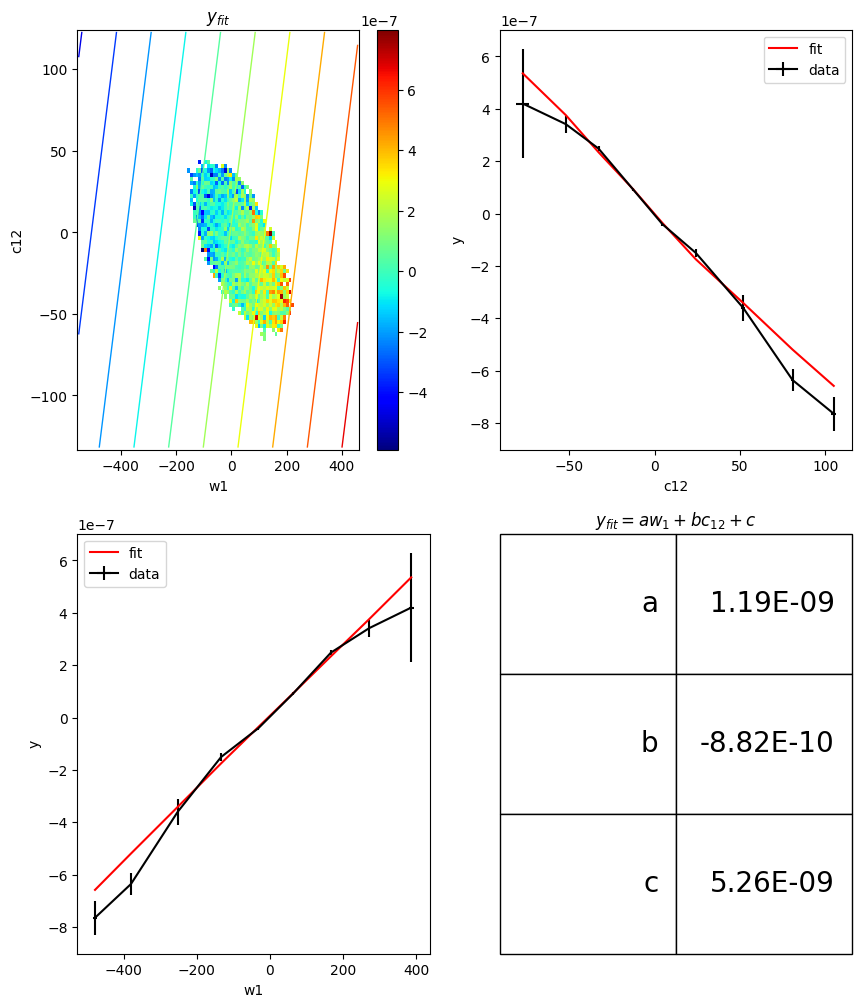

In [128]:
from scipy.optimize import minimize

res = minimize(loss, [1E-7,-1E-7,-1E-7,-1E-7,1E-7,1E-7], method='Powell', tol=1E-20)

print(res.x)
fig,ax = plt.subplots(2,2,figsize=(10,12))
y_fit = fit_func(w1_binned,c12_binned,res.x[0],res.x[1],res.x[2])
y_res = y_fit-y_binned

y_masked_fit = fit_func(w1_masked,c12_masked,res.x[0],res.x[1],res.x[2])
#map y_res to colormap

def gen_color(x):
    x-=np.min(x)
    x/=np.max(x)
    x*=255
    return x.astype(int)

H,xedges,yedges = np.histogram2d(w1_masked,c12_masked,100)
H1,xedges1,yedges1 = np.histogram2d(w1_masked,c12_masked,100,weights=y_masked)
H1/=H
H1[H<20] = np.nan

w1_grid,c12_grid = np.meshgrid(xedges[:-1],yedges[:-1])

y_fit_mesh = fit_func(w1_grid,c12_grid,res.x[0],res.x[1],res.x[2])
ax[0,0].contour(w1_grid,c12_grid,y_fit_mesh,levels=10,linewidths=1.0,cmap='jet')
#plt.scatter(w1_masked,c12_masked,c=y_res,s=0.5,alpha=0.25)
ax[0,0].set_xlabel('w1')
ax[0,0].set_ylabel('c12')
ax[0,0].set_title('$y_{fit}$')
im = ax[0,0].pcolormesh(w1_grid,c12_grid,H1.T,cmap='jet')
cbar = fig.colorbar(im,ax=ax[0,0])
# ax[0,0].contour(xedges1[:-1], yedges1[:-1], H1.T, levels=10, linewidths=0.5, colors='k')
ax[1,0].errorbar(w1_binned,y_binned,xerr = w1_binned_err,yerr=y_binned_err,c='k',label ='data')
ax[1,0].plot(w1_binned,y_fit,c='r',label='fit')
ax[1,0].set_xlabel('w1')
ax[1,0].set_ylabel('y')
ax[1,0].legend()
ax[0,1].errorbar(c12_binned,y_binned,xerr = c12_binned_err,yerr=y_binned_err,c='k',label ='data')
ax[0,1].plot(c12_binned,y_fit,c='r',label='fit')
ax[0,1].set_xlabel('c12')
ax[0,1].set_ylabel('y')
ax[0,1].legend()
ax[1,1].axis('off')
ax[1,1].axis('tight')

param_table = ax[1,1].table(cellText=[['a',format(res.x[0],'.2E')],['b',format(res.x[1],'.2E')],['c',format(res.x[2],'.2E')]],loc='center',bbox=[0,0,1,1])
param_table.set_fontsize(20)
ax[1,1].set_title('$y_{fit} = a w_1+b c_{12}+c$')

fig.savefig('./output/w1w2fit/w1_w2_{}_fit.png'.format(ysample),dpi=400)

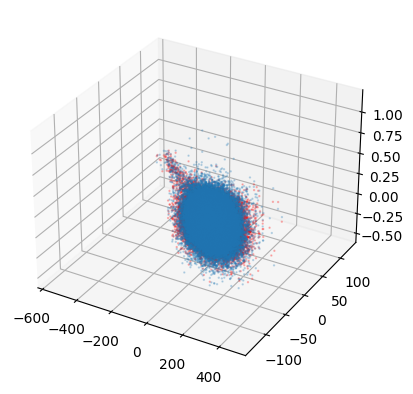

In [67]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(w1_masked,c12_masked,y_masked,s=0.5,alpha=0.25)
ax.scatter(w1_masked,c12_masked,y_masked_fit,s=0.5,alpha=0.25,c='r')